# Predictive Analysis Using Breast Cancer Wisconsin (Diagnostic) Data set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Data set link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## Loading the Data

In [5]:
#importing data processing libraries

import numpy as np
import pandas as pd

#importing data visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# storing the path of the dataset into a variable

data_path = '/content/breast_cancer_data.csv'

#loading the data set
data = pd.read_csv(data_path)

In [8]:
#checking out the first 10 rows of the data
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [9]:
# descibing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We can see that except the 'Unnamed: 32' column we don't have any columns with null value, now we can start using the 

## Data Cleaning

In [10]:
# dropping the 'id' and the 'Unnamed: 32' columns as they are not necessary

data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [11]:
# Changing the values in 'diagnosis' column, we will use 1 for 'M'(malignant tumor) and 0 for 'b'(benign tumor).

data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [12]:
#checking out the data again
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Analysis

In [13]:
# creating two new datasets, onw will contain only malignant sample and other will contain only benign sample

# data set with only samples of Malignant tumor

dataM = data[data.diagnosis == 1]

#data set with only samples of Benign tumor

dataB = data[data.diagnosis == 0]

In [14]:
# Number of data of Malignant samples

print('Number of Malignant Samples: ', dataM['diagnosis'].count())

# Number of data of Benign samples

print('Number of Benign Samples: ', dataB['diagnosis'].count())


Number of Malignant Samples:  212
Number of Benign Samples:  357


## Data Visualization

Data visualization is an important part of predictive analysis, with the help of data visualization we can find the co-relation between multiple feature and labels and also it helps us to choose the right machine learning model for our dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


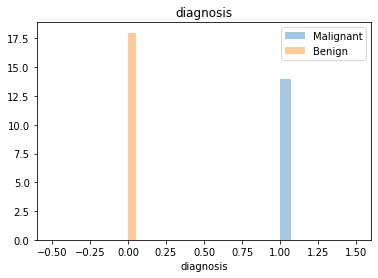

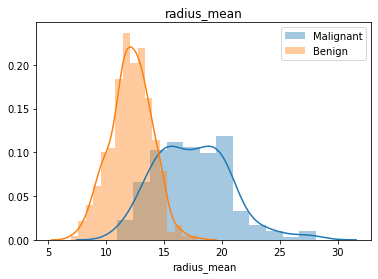

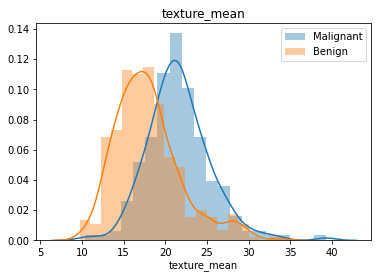

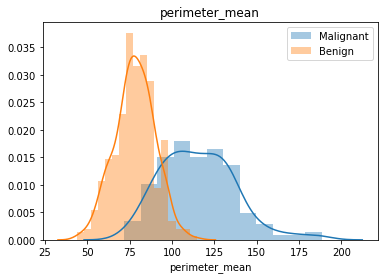

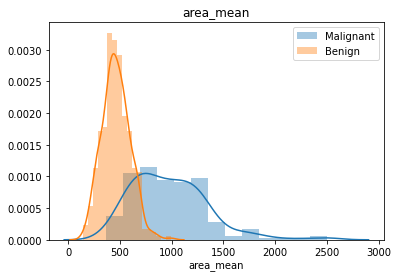

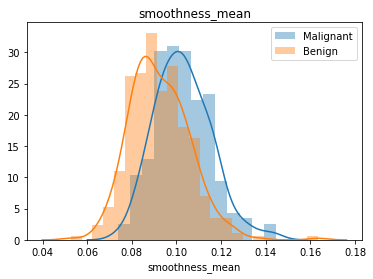

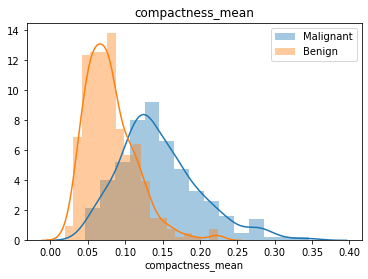

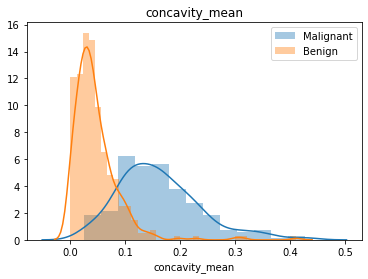

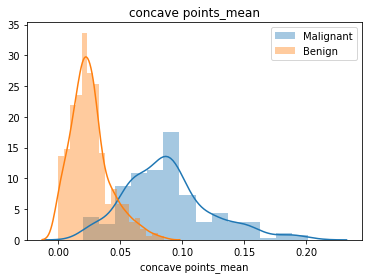

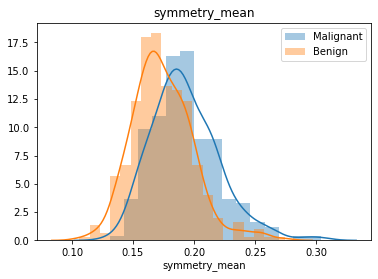

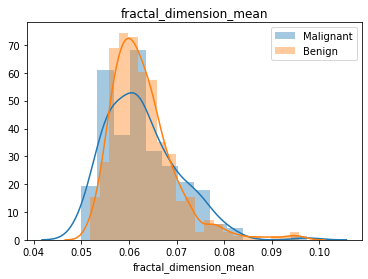

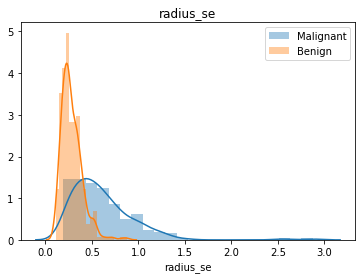

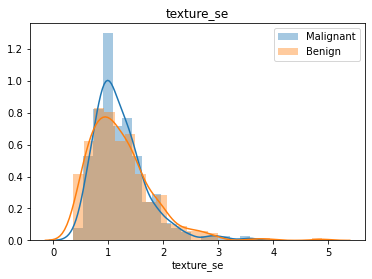

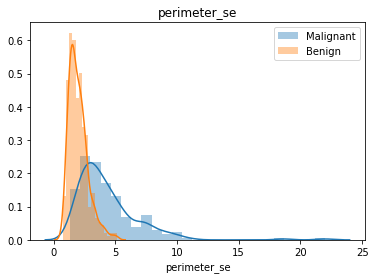

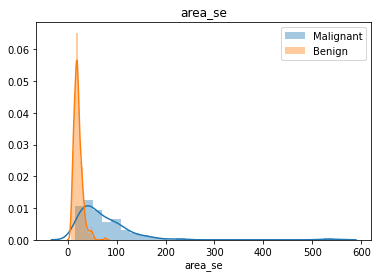

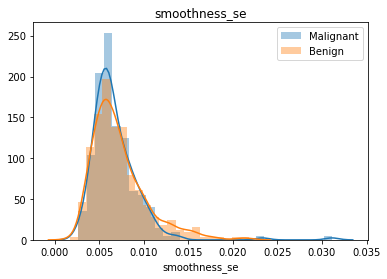

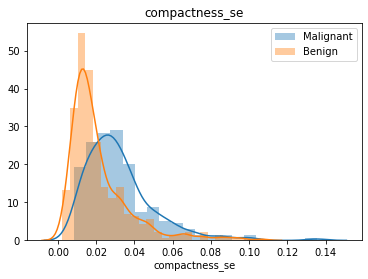

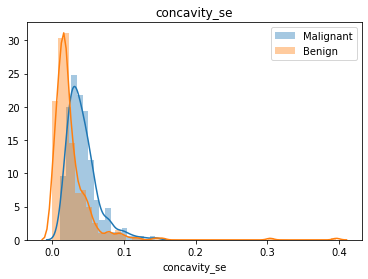

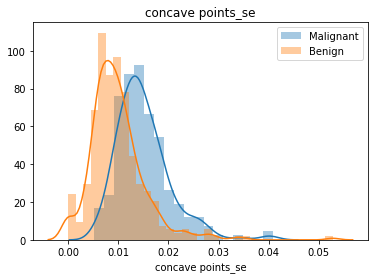

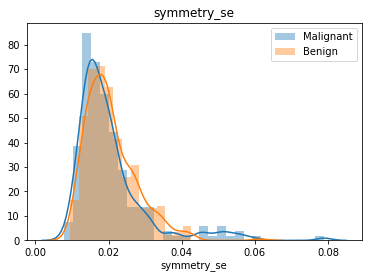

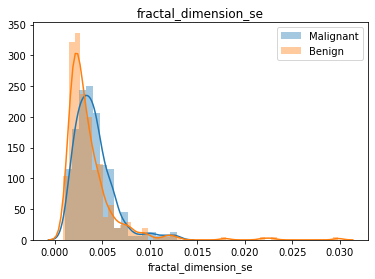

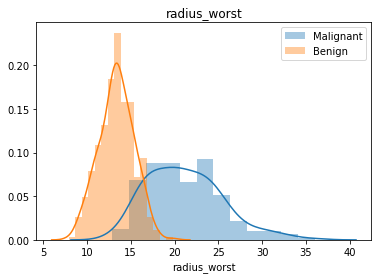

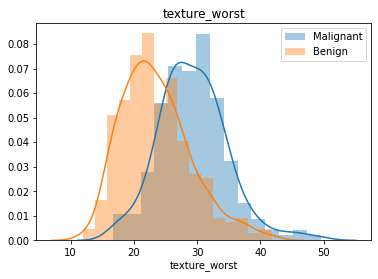

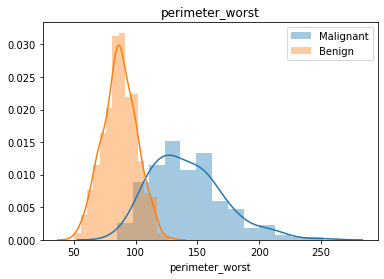

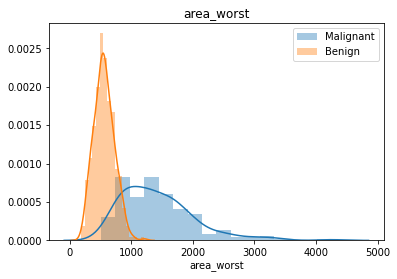

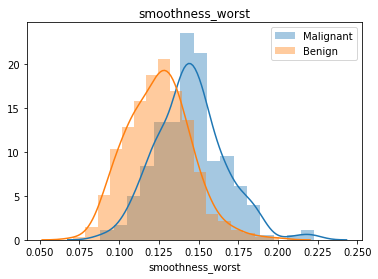

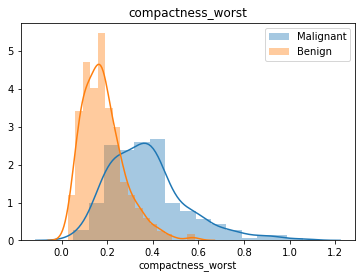

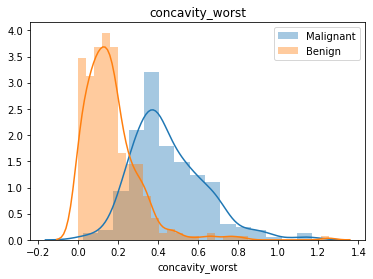

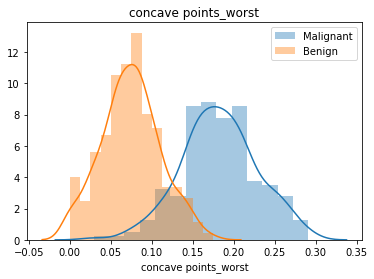

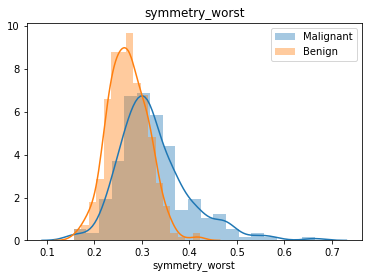

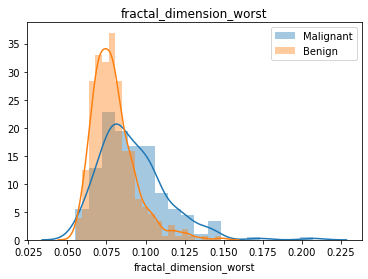

In [15]:
#creating a index list named 'columns' with all the columns name

columns = list(data.columns)

#plotting distribution of all the columns to visualize co-relation

for x in columns:
    dmd = sns.distplot(dataM[x], label = 'Malignant')
    dbd = sns.distplot(dataB[x], label = 'Benign')
    plt.legend(loc = 'upper right')
    plt.title(x)
    plt.show()


### Observations:

. Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Machine learning model building

Now as we are done checking out the data, now we have to build machine learning models to make predictive analysis about Breast cancer wisconsin(Diagnostic) data set. In this project I will be using PyCaret machine learning library to compare different kind of machine learning models to compare accuracy.




In [4]:
#installing PyCaret version 2.0
#no need to install if already installed 
#to check the version or to check wether or not it is insalled, run the below cell

!pip install pycaret==2.0

In [3]:
# checking version of our PyCaret module or wether or not it is present in our system

from pycaret.utils import version
version()

2.0


In [20]:
# Now we have to import classification module from the pycaret library

from pycaret.classification import *

#staging the data to compare various machine learning classification models 
clf1 = setup(data, target = 'diagnosis', session_id=123, log_experiment=True, experiment_name='cancer1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(569, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
#Comparing all the models to see which one is yielding the maximum accuracy
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9673,0.9961,0.9329,0.9795,0.9539,0.9287,0.9313,0.2517
1,Light Gradient Boosting Machine,0.9624,0.9918,0.9329,0.9665,0.9477,0.9184,0.9207,0.0969
2,Ada Boost Classifier,0.9622,0.9911,0.9395,0.9621,0.9484,0.9187,0.9215,0.1474
3,CatBoost Classifier,0.9622,0.9948,0.9395,0.9620,0.9479,0.9184,0.9217,9.3335
4,Linear Discriminant Analysis,0.9599,0.9920,0.8924,1.0000,0.9412,0.9112,0.9165,0.0091
5,Quadratic Discriminant Analysis,0.9571,0.9952,0.9390,0.9478,0.9420,0.9080,0.9097,0.0086
6,Gradient Boosting Classifier,0.9547,0.9921,0.9390,0.9453,0.9393,0.9033,0.9068,0.3530
7,Extreme Gradient Boosting,0.9522,0.9921,0.9329,0.9448,0.9344,0.8970,0.9020,0.0798
8,Random Forest Classifier,0.9498,0.9850,0.9262,0.9473,0.9331,0.8931,0.8975,0.1135
9,Ridge Classifier,0.9497,0.0000,0.8852,0.9788,0.9268,0.8890,0.8944,0.0125


### Observation

We can see from the above digram that 4 models are providing accuracy more than 95% and they are:
          
          1. Extra Trees Classifier
          2. Light Gradient Boosting Machine
          3. CatBoost Classifier
          4. Liniear Discriminant Analysis

Light Gradient Boosting Machine is yielding highest accuracy in the least time. 



In [22]:
## Checking out all the models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [23]:
# Creating a Light Gradient Boosting Model

lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
1,0.9500,0.9760,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9000,0.9813,0.8000,0.9231,0.8571,0.7808,0.7856
3,0.9500,0.9973,0.8667,1.0000,0.9286,0.8904,0.8958
4,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
5,0.9500,0.9973,0.9333,0.9333,0.9333,0.8933,0.8933
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,0.9743,0.9286,1.0000,0.9630,0.9434,0.9449
9,0.9744,1.0000,1.0000,0.9333,0.9655,0.9451,0.9466


In [24]:
# Tuning Hyper Parameters

tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9867,1.0000,0.8824,0.9375,0.8961,0.9010
1,0.9500,0.9787,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9000,0.9947,0.7333,1.0000,0.8462,0.7746,0.7951
3,0.9500,1.0000,0.8667,1.0000,0.9286,0.8904,0.8958
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,0.9920,1.0000,0.9375,0.9677,0.9474,0.9487
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9231,0.9757,0.9286,0.8667,0.8966,0.8354,0.8367
9,0.9744,1.0000,1.0000,0.9333,0.9655,0.9451,0.9466


### Visualiztion of the model


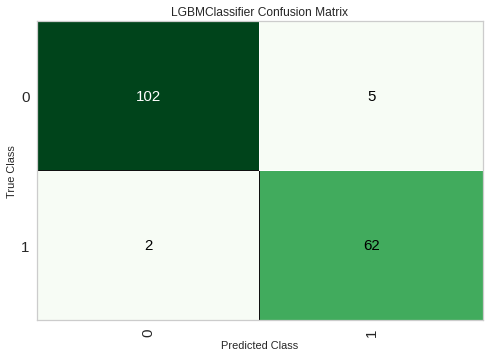

In [25]:
plot_model(lightgbm, plot = 'confusion_matrix')

### Observation

We have chosen 70% of our total dataset as our training data and 30% of total dataset as our test data.
In the above confusion matrix we can see that we are only having 2.9% false positives and 1.1% false negatives and which is really impressive.
Now we have the build model for prediction

In [26]:
#checking out out model and parameters

lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
## Run the cell to test out your data 
# specify path for the new dataset

test_path = '[specify your path]'

#load dataset

test_data = pd.read_csv(test_path)

# Drop the irrelevant columns

prediction = predict_model(lightgbm, data = test_data)

#checkout the prediction

prediction.head()

## Univariate Model

we can build a model with only 'radius_mean' as our feature and let's check how that turns ou


In [28]:
# create a new data set with only 'radius_mean' and 'diagnosis' columns

uni_data = data[['radius_mean','diagnosis']]

uni_data.head() #checking out the data


,radius_mean,diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1


In [29]:
#staging the data to compare various machine learning classification models 

clf1 = setup(uni_data, target = 'diagnosis', session_id=123, log_experiment=True, experiment_name='uni_cancer')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(569, 2)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [30]:
#Comparing all the models to see which one is yielding the maximum accuracy
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.8767,0.9341,0.7229,0.9402,0.8052,0.7198,0.7419,0.0053
1,Quadratic Discriminant Analysis,0.8767,0.9341,0.7229,0.9402,0.8052,0.7198,0.7419,0.0052
2,CatBoost Classifier,0.8692,0.9317,0.7429,0.9041,0.8021,0.7078,0.7262,0.7131
3,Linear Discriminant Analysis,0.8668,0.9344,0.6829,0.9513,0.7825,0.6936,0.7215,0.0053
4,Logistic Regression,0.8667,0.9344,0.7767,0.8692,0.8045,0.7061,0.7216,0.0132
5,K Neighbors Classifier,0.8667,0.9026,0.7700,0.8739,0.8046,0.7060,0.7210,0.0037
6,Light Gradient Boosting Machine,0.8667,0.9195,0.7362,0.9019,0.7980,0.7020,0.7198,0.0286
7,Ridge Classifier,0.8643,0.0000,0.6762,0.9498,0.7776,0.6874,0.7159,0.0076
8,Ada Boost Classifier,0.8617,0.9051,0.7229,0.8938,0.7910,0.6908,0.7061,0.0828
9,Extreme Gradient Boosting,0.8617,0.9213,0.7362,0.8854,0.7924,0.6918,0.7076,0.0227


## Observation

From the above matrics we can observe that the best accuracy that we are getting is 87.67% with Naive Bayes classification now lets build the model and plot the confusion matrix to see the number of false negatives and false positives.


In [32]:
#building univariate model

uni_nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.9147,0.8000,0.8000,0.8000,0.6800,0.6800
1,0.8750,0.9707,0.6667,1.0000,0.8000,0.7143,0.7454
2,0.8000,0.8907,0.4667,1.0000,0.6364,0.5224,0.5946
3,0.8750,0.8667,0.6667,1.0000,0.8000,0.7143,0.7454
4,0.9250,0.9707,0.8000,1.0000,0.8889,0.8333,0.8452
5,0.8250,0.9067,0.5333,1.0000,0.6957,0.5882,0.6455
6,0.9750,0.9893,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9500,0.9920,0.8667,1.0000,0.9286,0.8904,0.8958
8,0.8205,0.8943,0.6429,0.8182,0.7200,0.5907,0.6000
9,0.8718,0.9457,0.7857,0.8462,0.8148,0.7170,0.7181


In [33]:
# tuning the model

tuned_uni_nb = tune_model(uni_nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8250,0.9147,0.7333,0.7857,0.7586,0.6216,0.6225
1,0.8750,0.9707,0.6667,1.0000,0.8000,0.7143,0.7454
2,0.8000,0.8907,0.4667,1.0000,0.6364,0.5224,0.5946
3,0.8500,0.8667,0.6000,1.0000,0.7500,0.6522,0.6956
4,0.9250,0.9707,0.8000,1.0000,0.8889,0.8333,0.8452
5,0.8250,0.9067,0.5333,1.0000,0.6957,0.5882,0.6455
6,0.9750,0.9893,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9500,0.9920,0.8667,1.0000,0.9286,0.8904,0.8958
8,0.8205,0.8943,0.6429,0.8182,0.7200,0.5907,0.6000
9,0.8718,0.9457,0.7857,0.8462,0.8148,0.7170,0.7181


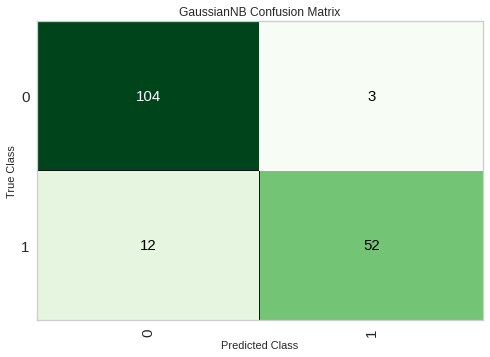

In [34]:
#plotting the model

plot_model(tuned_uni_nb, plot = 'confusion_matrix')

## Observation

The amount of false positives are 1.75% and false negatives are 7%. That means in 7% of the cases it will show that the patient is safe even if the patient has benign cancer and in the case of healthcare we cannot work with such high margins.

So we cannot count on univariate models everytime, even the multivariate model shows 1.1% false negatives and we have to remember that,


# Conclusion

In this self-guided project of mine I have tired to build a predictive model to predict whether a breast cancer tumor sample is malignant or benign by using different properties of it, such as radius, texture, perimeter etc. First we dropped all the unnecessary columns(i.e: 'id' and 'unnamed: 32'). Then we create to dataframes names 'dataM' which contained all the samples with malignant tumors and 'dataB' which contained all the samples with benign tumor. With the help of these two dataframes we plot the histogram for all the features and analised the corelation between various features with our target label. After visualizing the data we importer pycaret library to build our machine learning models. We compared all the models and 'Extra Trees Classifier' model yielded us the highest accuracy (96.73%) We then tuned the model and the number of false negatives was only two (1.1%).
I also tried to  build a univariate model with only 'radius_mean' as the feature and the accuracy was not high as the multi-variate model(87.67%) also the number of false negatives are high.

This project helped me to visualize corelation between different features of the breast cancer tumor and build a predictive analysis model with 96.73 % accuracy and only 1.1% false-negatives. The project has further room for improvement and I will keep improving the model as I keep learning various machine learning techniques. Also the project is uploaded to my github repository, feel free to contribute.

#### Avishek Chatterjee
#### Jadavpur University
#### Department of Mechanical Engineering
#### 15-07-2020
